## Project Objective / Business Relevance

The aim of this project is to group bank customers using their transaction behaviour. This will be done using RFM analysis which is a powerful method to quantify behaviour using the following criteria:
- Recency: how recent a customer has made a purchase
- Frequency: how frequently a customer makes purchases
- Monetary: how much money a customer spends

The results of this project are extremely useful from a marketing perspective to tailer targeted marketing strategies based on customer behaviour to guide promotional content.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)
# pd.reset_option("display.max_rows")
# pd.reset_option("display.max_columns")

## Importing and Cleaning Data

The bank_transactions dataset was taken from kaggle at https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation. The dataset contains over 1 million transactions from an Indian Bank.

In [3]:
# Importing bank transactions data
bank_df = pd.read_csv('bank_transactions.csv')
bank_df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


First the columns that would be used for demographic segmentation but are not of interest to us are removed. In addition, the account balance and the transaction time will not be used. Only the transaction date will be used for recency as the number of days since the last transaction is sufficient information for recency criteria.

In [4]:
# Dropping columns that won't be used
bank_df = bank_df.drop(['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionTime'], axis=1)
bank_df

,TransactionID,CustomerID,TransactionDate,TransactionAmount (INR)
0,T1,C5841053,2/8/16,25.0
1,T2,C2142763,2/8/16,27999.0
2,T3,C4417068,2/8/16,459.0
3,T4,C5342380,2/8/16,2060.0
4,T5,C9031234,2/8/16,1762.5
...,...,...,...,...
1048562,T1048563,C8020229,18/9/16,799.0
1048563,T1048564,C6459278,18/9/16,460.0
1048564,T1048565,C6412354,18/9/16,770.0
1048565,T1048566,C6420483,18/9/16,1000.0


In [5]:
# Checking for missing values
bank_df.isna().sum()

TransactionID              0
CustomerID                 0
TransactionDate            0
TransactionAmount (INR)    0
dtype: int64

There are no missing values in the remaining columns.

In [6]:
# Showing column data types
bank_df.dtypes

TransactionID               object
CustomerID                  object
TransactionDate             object
TransactionAmount (INR)    float64
dtype: object

In [7]:
# Displaying number of unique dates in dataset
bank_df['TransactionDate'].unique()

array(['2/8/16', '1/8/16', '3/8/16', '5/8/16', '4/8/16', '6/8/16',
       '9/8/16', '8/8/16', '12/8/16', '7/8/16', '21/10/16', '16/10/16',
       '10/8/16', '14/8/16', '17/8/16', '21/8/16', '19/8/16', '24/8/16',
       '22/8/16', '29/8/16', '31/8/16', '22/9/16', '23/9/16', '13/8/16',
       '25/8/16', '28/8/16', '15/8/16', '27/8/16', '20/8/16', '23/8/16',
       '30/8/16', '11/8/16', '16/8/16', '26/8/16', '27/9/16', '18/8/16',
       '25/9/16', '26/9/16', '30/9/16', '3/9/16', '2/9/16', '1/9/16',
       '6/9/16', '5/9/16', '4/9/16', '9/9/16', '8/9/16', '7/9/16',
       '12/9/16', '11/9/16', '10/9/16', '15/9/16', '14/9/16', '13/9/16',
       '18/9/16'], dtype=object)

From the date entries it is clear that the dates are spread out over 3 months in 2016 (Aug, Sep, Oct) so the format is day/month/year.

In [8]:
# Converting TransactionDate type to DateTime
from datetime import date
bank_df['TransactionDate'] = pd.to_datetime(bank_df['TransactionDate'], format="%d/%m/%y")
bank_df['TransactionDate']

0         2016-08-02
1         2016-08-02
2         2016-08-02
3         2016-08-02
4         2016-08-02
             ...    
1048562   2016-09-18
1048563   2016-09-18
1048564   2016-09-18
1048565   2016-09-18
1048566   2016-09-18
Name: TransactionDate, Length: 1048567, dtype: datetime64[ns]

We would convert the transaction amount values from Indian Rupees (INR) to CAD or USD. However, general prices in india likely don't convert the same way currency does. So the amounts will be kept in INR for now.

In [9]:
# Renaming transaction amount column
bank_df.rename(columns={'TransactionAmount (INR)': 'Amount', 'TransactionDate': 'Date'}, inplace=True)

In [10]:
# Looking at transaction amount distribution stats
bank_df.describe()

,Date,Amount
count,1048567,1.048567e+06
mean,2016-08-25 04:33:33.797497600,1.574335e+03
min,2016-08-01 00:00:00,0.000000e+00
25%,2016-08-12 00:00:00,1.610000e+02
50%,2016-08-25 00:00:00,4.590300e+02
75%,2016-09-06 00:00:00,1.200000e+03
max,2016-10-21 00:00:00,1.560035e+06
std,NaN,6.574743e+03


In [11]:
# Determining outliers
Q1 = bank_df['Amount'].quantile(0.25)
Q3 = bank_df['Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers_filter = (bank_df['Amount'] < (Q1 - 1.5 * IQR)) | (bank_df['Amount'] > (Q3 + 1.5 * IQR))
outliers = bank_df[outliers_filter]
outliers['Amount'].unique()
print(f"There are {len(outliers)} outliers.")

There are 112134 outliers.


Because transaction amounts can very significantly there is a large variation in the values in this column. The IQR outlier method determines there are 112134 outliers in this dataset (which is roughly a tenth of the dataset). These are likely actual transactions from clients spending large sums of money instead of erros in data collection. These outliers will therefore be kept. 

From the describe dataframe, we see that the minimum transaction amount is 0. This doesn't make sense in the context of our problem so observations with TransactionAmount of 0 will be removed.

In [12]:
# Determining rows to drop with 0 transaction amount
zero_amount_rows = bank_df[bank_df['Amount'] == 0]
rows_to_drop = zero_amount_rows.index
# Dropping specified rows
bank_df.drop(labels=rows_to_drop, axis=0, inplace=True)
bank_df.shape

(1047732, 4)

In [13]:
# Ensuring all transactionID values are unique
if bank_df['TransactionID'].nunique() == len(bank_df):
    print("There are no duplicate transaction ID's")

There are no duplicate transaction ID's


In [14]:
duplicates = bank_df.duplicated(subset='TransactionID')
duplicates.any()

False

## Data Exploration

Seaborn is unable to plot a histogram using the 1 million observations due to computational limitations. A simple random sample of 1/10th of the dataset will be used for visualizations.

In [15]:
# Simple random sample of banf_df
bank_df_sample = bank_df.sample(frac=0.1, replace=False, random_state=99)
bank_df_sample

,TransactionID,CustomerID,Date,Amount
770653,T770654,C7742134,2016-09-06,150.0
1021810,T1021811,C1017658,2016-09-13,100.0
872142,T872143,C2213570,2016-09-08,235.0
219350,T219351,C1928717,2016-08-07,100.0
264397,T264398,C5514982,2016-08-12,2573.0
...,...,...,...,...
629913,T629914,C4725540,2016-08-29,7900.0
147349,T147350,C2714477,2016-08-05,1577.5
403478,T403479,C1926523,2016-08-18,5649.5
492401,T492402,C8437568,2016-08-20,319.0


In [16]:
# Ensuring min transaction is above 0 now
bank_df_sample.describe()

,Date,Amount
count,104773,104773.000000
mean,2016-08-25 03:12:48.873660160,1589.929454
min,2016-08-01 00:00:00,0.010000
25%,2016-08-12 00:00:00,160.000000
50%,2016-08-24 00:00:00,468.000000
75%,2016-09-06 00:00:00,1200.000000
max,2016-10-21 00:00:00,720001.160000
std,NaN,6647.166589


From the distribution stats above, it is clear that the random sample has similar characteristics to the whole dataset so is likely a good representation.

/Users/graham/anaconda3/envs/DataScience/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


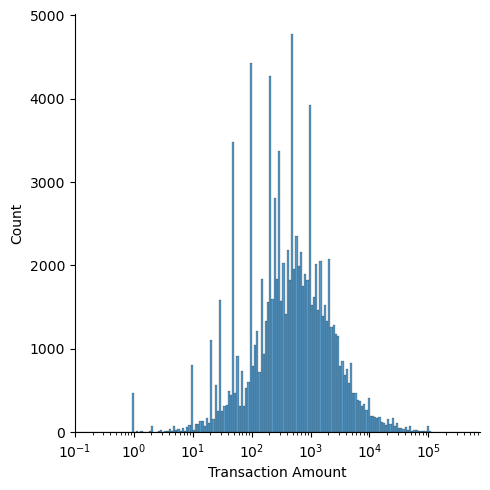

In [17]:
# Plotting distribution of transaction amount variable as a histogram
sns.displot(data=bank_df_sample, x='Amount', log_scale=(True, False))
palette = sns.color_palette('Set2')
sns.set_palette(palette)
plt.xlim(0.1, 750000)
plt.xlabel('Transaction Amount')
plt.show()

In [18]:
bank_df_sample['log_transaction'] = np.log(bank_df_sample['Amount'])
bank_df_sample.describe()

,Date,Amount,log_transaction
count,104773,104773.000000,104773.000000
mean,2016-08-25 03:12:48.873660160,1589.929454,6.050345
min,2016-08-01 00:00:00,0.010000,-4.605170
25%,2016-08-12 00:00:00,160.000000,5.075174
50%,2016-08-24 00:00:00,468.000000,6.148468
75%,2016-09-06 00:00:00,1200.000000,7.090077
max,2016-10-21 00:00:00,720001.160000,13.487008
std,NaN,6647.166589,1.623146


/Users/graham/anaconda3/envs/DataScience/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


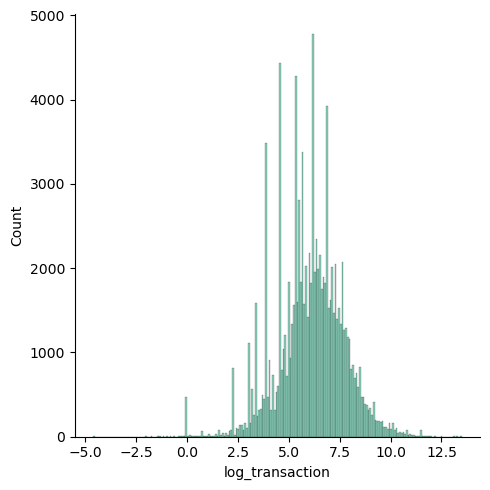

In [19]:
sns.displot(data=bank_df_sample, x='log_transaction')
plt.show()

It is clearn from the histogram above that the transaction amount variable follows a log normal distribution since the variable appears normally distributed with a log scale x-axis.

In [20]:
# Getting month and day of week information
bank_df_sample['Month'] = pd.DatetimeIndex(bank_df_sample['Date']).month
bank_df_sample['Day of Week'] = pd.DatetimeIndex(bank_df_sample['Date']).dayofweek

In [21]:
bank_df_sample

,TransactionID,CustomerID,Date,Amount,log_transaction,Month,Day of Week
770653,T770654,C7742134,2016-09-06,150.0,5.010635,9,1
1021810,T1021811,C1017658,2016-09-13,100.0,4.605170,9,1
872142,T872143,C2213570,2016-09-08,235.0,5.459586,9,3
219350,T219351,C1928717,2016-08-07,100.0,4.605170,8,6
264397,T264398,C5514982,2016-08-12,2573.0,7.852828,8,4
...,...,...,...,...,...,...,...
629913,T629914,C4725540,2016-08-29,7900.0,8.974618,8,0
147349,T147350,C2714477,2016-08-05,1577.5,7.363597,8,4
403478,T403479,C1926523,2016-08-18,5649.5,8.639322,8,3
492401,T492402,C8437568,2016-08-20,319.0,5.765191,8,5


In [22]:
bank_df_sample['Month'].replace({8:'August', 9:'September', 10:'October'}, inplace=True)
bank_df_sample['Day of Week'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)
bank_df_sample

,TransactionID,CustomerID,Date,Amount,log_transaction,Month,Day of Week
770653,T770654,C7742134,2016-09-06,150.0,5.010635,September,Tuesday
1021810,T1021811,C1017658,2016-09-13,100.0,4.605170,September,Tuesday
872142,T872143,C2213570,2016-09-08,235.0,5.459586,September,Thursday
219350,T219351,C1928717,2016-08-07,100.0,4.605170,August,Sunday
264397,T264398,C5514982,2016-08-12,2573.0,7.852828,August,Friday
...,...,...,...,...,...,...,...
629913,T629914,C4725540,2016-08-29,7900.0,8.974618,August,Monday
147349,T147350,C2714477,2016-08-05,1577.5,7.363597,August,Friday
403478,T403479,C1926523,2016-08-18,5649.5,8.639322,August,Thursday
492401,T492402,C8437568,2016-08-20,319.0,5.765191,August,Saturday


In [23]:
bank_df_sample['Month'].unique()

array(['September', 'August', 'October'], dtype=object)

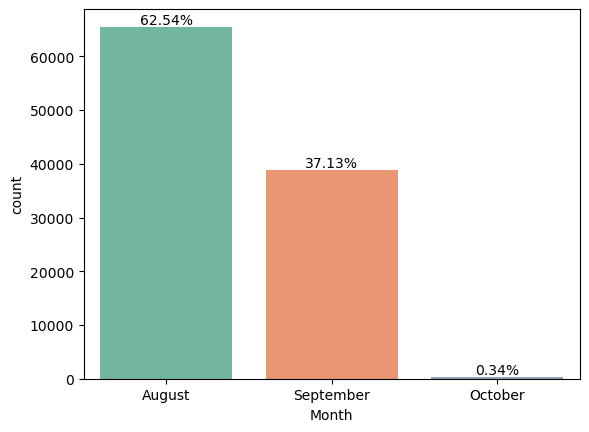

In [24]:
# Visualizing transactions across months in count plot
ax = sns.countplot(data=bank_df_sample, x='Month', order=['August', 'September', 'October'])
# Adding percentage labels to bars
percentages = bank_df_sample['Month'].value_counts() / len(bank_df_sample)
percentages_formatted = percentages.apply(lambda x: f"{x*100:.2f}%")
ax.bar_label(container=ax.containers[0], labels=percentages_formatted)
plt.show()

It is clear that the majority of transation occured in August and September while a very small fraction occured in October.

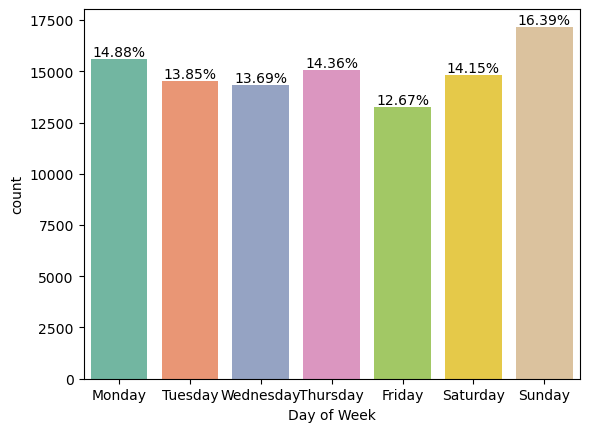

In [25]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Visualizing transaction count across days of the week
ax = sns.countplot(data=bank_df_sample, x='Day of Week', order=weekday_order)
# Creating percentage of counts for labels
percentages = bank_df_sample['Day of Week'].value_counts() / len(bank_df_sample)
percentages = percentages.sort_index(key=lambda x: pd.Categorical(x, categories=weekday_order, ordered=True))
# Adding percentage labels to bars
percentages_formatted = percentages.apply(lambda x: f"{x*100:.2f}%")
ax.bar_label(container=ax.containers[0], labels=percentages_formatted)
plt.show()

The number of transactions are fairly evenly spread across each day of the week with Sunday having the most transactions and Friday the least.

In [26]:
# Grouping transactions by customer
grouped_cust = bank_df.groupby('CustomerID')['TransactionID'].count().reset_index(name='Transactions')
grouped_cust['Transactions'] = grouped_cust['Transactions'].astype('category')
grouped_cust

,CustomerID,Transactions
0,C1010011,2
1,C1010012,1
2,C1010014,2
3,C1010018,1
4,C1010024,1
...,...,...
883655,C9099836,1
883656,C9099877,1
883657,C9099919,1
883658,C9099941,1


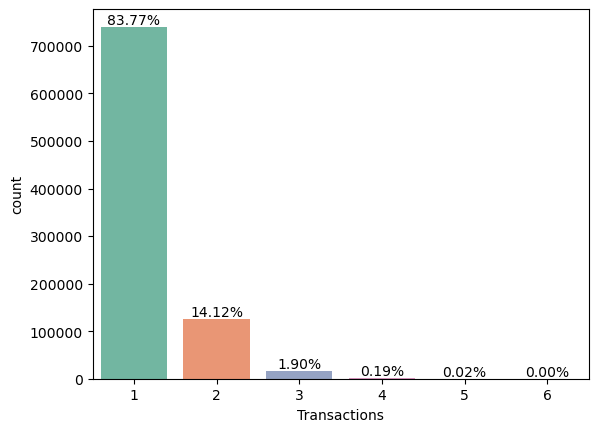

In [27]:
# Plotting amount of transactions per customer
ax = sns.countplot(data=grouped_cust, x='Transactions')
# Adding percentage labels to bars
percentages = grouped_cust['Transactions'].value_counts() / len(grouped_cust)
percentages_formatted = percentages.apply(lambda x: f"{x*100:.2f}%")
ax.bar_label(container=ax.containers[0], labels=percentages_formatted)
plt.show()

From the count plot above it is clear that the majority of customers have made only one transaction while a much smaller portion have made 2 or 3.

## Feature Engineering - RFM

The existing features will now be transformed into features used for RFM. The RFM features will be obtained as follows:
- Recency: the number of days since the customer's last purchase will be calculated. This will be done using a reference date, which will be 2016-10-22 since it is one day after the latest date in the dataset (2016-10-21). The date of most recent purchase will then be subtracted from this reference date for each customer
- Frequency: the number of total transactions from each customer during the time period.
- Monetary: the average purchase amount calculated by dividing total amount spent by number of transactions

In [28]:
# Making reference date for recency
ref_date = pd.to_datetime('22/10/16', format="%d/%m/%y")
ref_date

Timestamp('2016-10-22 00:00:00')

In [29]:
# Using pandas groupby.agg to group the observations by CustomerID then applying specific functions to each column to obtain the RFM variables
rfm_df = bank_df.groupby('CustomerID').agg({'Date': lambda x: (ref_date - x.max()), 'TransactionID': 'count', 'Amount': 'sum'})
rfm_df

,Date,TransactionID,Amount
CustomerID,,,
C1010011,26 days,2,5106.0
C1010012,69 days,1,1499.0
C1010014,76 days,2,1455.0
C1010018,37 days,1,30.0
C1010024,65 days,1,5000.0
...,...,...,...
C9099836,76 days,1,691.0
C9099877,37 days,1,222.0
C9099919,65 days,1,126.0


In [30]:
# Renaming column as RFM variables
rfm_df.rename(columns={'Date':'Recency', 'TransactionID':'Frequency', 'Amount':'Monetary'}, inplace=True)
# Dividing total amount spent by number of transactions
rfm_df['Monetary'] = rfm_df['Monetary'] / rfm_df['Frequency']
# Removing 'days' from Recency
rfm_df['Recency'] = rfm_df['Recency'].dt.days
rfm_df

,Recency,Frequency,Monetary
CustomerID,,,
C1010011,26,2,2553.0
C1010012,69,1,1499.0
C1010014,76,2,727.5
C1010018,37,1,30.0
C1010024,65,1,5000.0
...,...,...,...
C9099836,76,1,691.0
C9099877,37,1,222.0
C9099919,65,1,126.0


In [31]:
# Examining the distribution statistics
rfm_df.describe()

,Recency,Frequency,Monetary
count,883660.000000,883660.000000,8.836600e+05
mean,56.306991,1.185673,1.576040e+03
std,15.226267,0.450527,6.445248e+03
min,1.000000,1.000000,1.000000e-02
25%,44.000000,1.000000,1.930000e+02
50%,56.000000,1.000000,5.000000e+02
75%,69.000000,1.000000,1.249020e+03
max,82.000000,6.000000,1.560035e+06


The distribution statistics show that the Recency and frequency are in a relatively small range. However the Monetary values are spread across several different orders of magnitude. Although we want to keep customer information as much as possible, clustering is sensitive to outliers. Therefore the large outliers in the monetary column will be removed.

In [71]:
# Removing outliers
from scipy import stats
# Keeping values for which z-score is smaller 3 (less than 3 standard deviations from the mean)
keep = (np.abs(stats.zscore(rfm_df['Monetary'])) < 3)
rfm_df_filtered = rfm_df[keep]
rfm_df_filtered

,Recency,Frequency,Monetary
CustomerID,,,
C1010011,26,2,2553.0
C1010012,69,1,1499.0
C1010014,76,2,727.5
C1010018,37,1,30.0
C1010024,65,1,5000.0
...,...,...,...
C9099836,76,1,691.0
C9099877,37,1,222.0
C9099919,65,1,126.0


In [74]:
rfm_df_filtered.describe()

,Recency,Frequency,Monetary
count,875808.000000,875808.000000,875808.000000
mean,56.304472,1.186078,1176.400496
std,15.221965,0.451015,2135.207340
min,1.000000,1.000000,0.010000
25%,44.000000,1.000000,190.000000
50%,56.000000,1.000000,499.000000
75%,69.000000,1.000000,1200.000000
max,82.000000,6.000000,20910.000000


We see that the monetary values are now in a much more reasonable range. Let's plot the variables now to see their distributions.

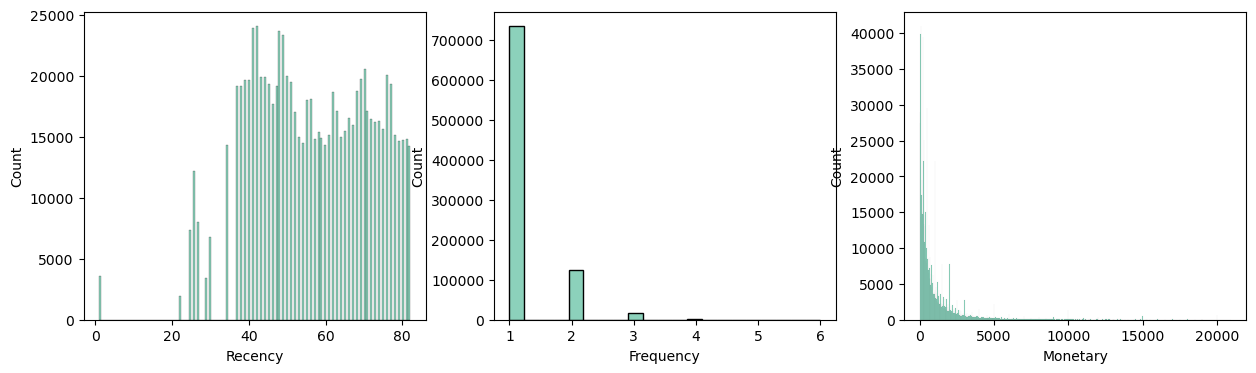

In [75]:
# format of 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# create histograms
for i, col in enumerate(rfm_df_filtered.columns):
    sns.histplot(data=rfm_df_filtered, x=col, ax=axes[i])
plt.show()

From the histograms above, we can see that the frequency and monetary features follow clear power law distributions while the recency feature doesn't follow any clear distribution. The frequency and monetary features will be transformed using a log function which should make their distributions appear roughly normal.

In [76]:
from scipy.stats import boxcox
rfm_df_filtered['Monetary_log'] = np.log(rfm_df_filtered['Monetary'])
rfm_df_filtered['Frequency_log'] = np.log(rfm_df_filtered['Frequency'])
rfm_df_filtered

/var/folders/lw/b_8l9ggd16z8sjbbwh204hf40000gn/T/ipykernel_21750/2241240054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df_filtered['Monetary_log'] = np.log(rfm_df_filtered['Monetary'])
/var/folders/lw/b_8l9ggd16z8sjbbwh204hf40000gn/T/ipykernel_21750/2241240054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df_filtered['Frequency_log'] = np.log(rfm_df_filtered['Frequency'])


,Recency,Frequency,Monetary,Monetary_log,Frequency_log
CustomerID,,,,,
C1010011,26,2,2553.0,7.845024,0.693147
C1010012,69,1,1499.0,7.312553,0.000000
C1010014,76,2,727.5,6.589614,0.693147
C1010018,37,1,30.0,3.401197,0.000000
C1010024,65,1,5000.0,8.517193,0.000000
...,...,...,...,...,...
C9099836,76,1,691.0,6.538140,0.000000
C9099877,37,1,222.0,5.402677,0.000000
C9099919,65,1,126.0,4.836282,0.000000


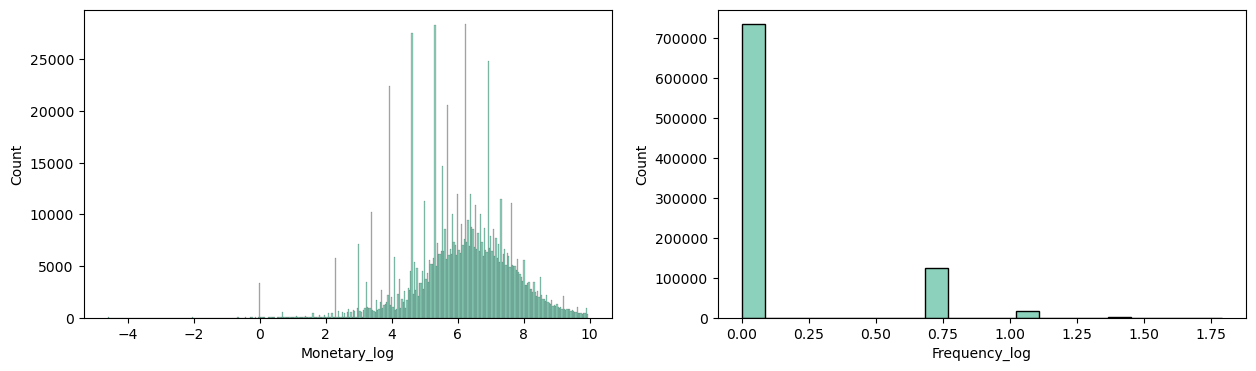

In [77]:
# Plotting the newly log transformed distributions
# format of 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15,4))
# create histograms
for i, col in enumerate(rfm_df_filtered.columns[-2:]):
    sns.histplot(data=rfm_df_filtered, x=col, ax=axes[i])
plt.show()

In [78]:
# Removing original monetary and frequency features
rfm_df_filtered.drop(['Monetary', 'Frequency'], axis=1, inplace=True)
rfm_df_filtered.columns

/var/folders/lw/b_8l9ggd16z8sjbbwh204hf40000gn/T/ipykernel_21750/1290183852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df_filtered.drop(['Monetary', 'Frequency'], axis=1, inplace=True)


Index(['Recency', 'Monetary_log', 'Frequency_log'], dtype='object')

In [79]:
# Checking if applying log has made some values infinity
np.isinf(rfm_df_filtered).any()

Recency          False
Monetary_log     False
Frequency_log    False
dtype: bool

Justification for min maxscaler: Although monetary distribution is now normal, the other two features do not have normal dsitributions. Therefore StandardScaler won't be used since its works best for normal distributions. MinMaxScaler will be used instead because it works well on wide range of distributions.

**Try Robust Scaler?**

In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(rfm_df_filtered)
scaled_df = pd.DataFrame(scaled_array, index=rfm_df_filtered.index, columns=rfm_df_filtered.columns)
scaled_df

,Recency,Monetary_log,Frequency_log
CustomerID,,,
C1010011,0.308642,0.855498,0.386853
C1010012,0.839506,0.818910,0.000000
C1010014,0.925926,0.769234,0.386853
C1010018,0.444444,0.550147,0.000000
C1010024,0.790123,0.901685,0.000000
...,...,...,...
C9099836,0.925926,0.765697,0.000000
C9099877,0.444444,0.687676,0.000000
C9099919,0.790123,0.648756,0.000000


In [80]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# scaled_array = scaler.fit_transform(rfm_df_filtered)
# scaled_df = pd.DataFrame(scaled_array, index=rfm_df_filtered.index, columns=rfm_df_filtered.columns)
# scaled_df

,Recency,Monetary_log,Frequency_log
CustomerID,,,
C1010011,-1.20,0.885714,0.693147
C1010012,0.52,0.596807,0.000000
C1010014,0.80,0.204556,0.693147
C1010018,-0.76,-1.525409,0.000000
C1010024,0.36,1.250418,0.000000
...,...,...,...
C9099836,0.80,0.176627,0.000000
C9099877,-0.76,-0.439450,0.000000
C9099919,0.36,-0.746763,0.000000


/Users/graham/anaconda3/envs/DataScience/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


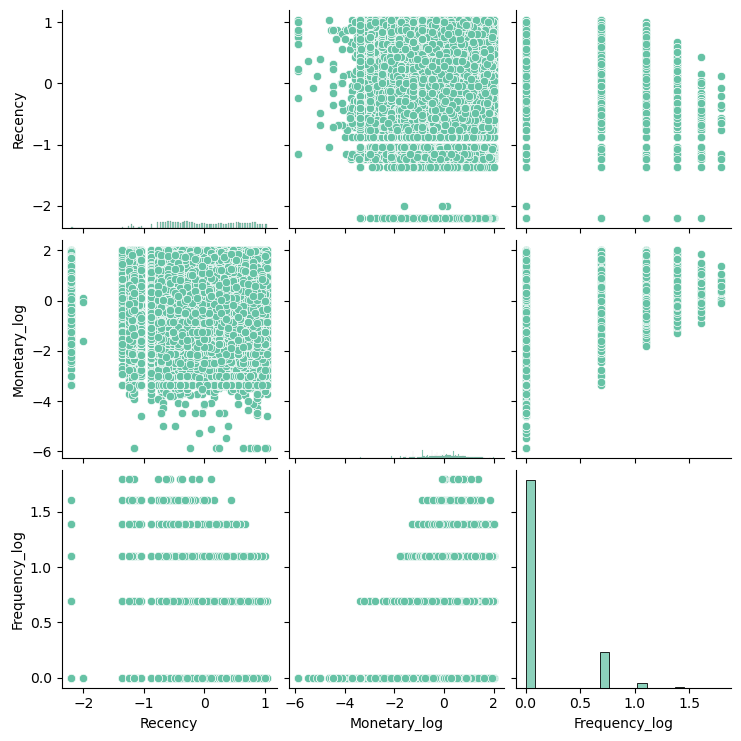

In [81]:
sns.pairplot(data=scaled_df)
plt.show()

<Axes: >

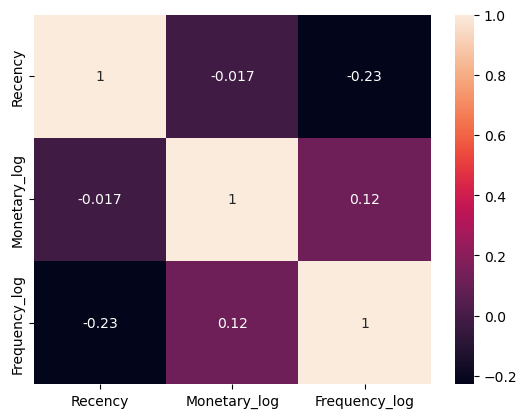

In [121]:
# heatmap of features
sns.heatmap(scaled_df.corr(), annot=True)

In [124]:
scaled_df['Frequency_log'].unique()

array([0.38685281, 0.        , 0.61314719, 0.77370561, 1.        ,
       0.8982444 ])

In [106]:
# from sklearn.preprocessing import KBinsDiscretizer
# make_bins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
# bin_array = make_bins.fit_transform(scaled_df)
# bin_df = pd.DataFrame(bin_array, index=scaled_df.index, columns=scaled_df.columns)
# bin_df.describe()

,Recency,Monetary_log,Frequency_log
count,875808.000000,875808.000000,875808.000000
mean,2.861555,2.620655,0.186062
std,0.959798,0.953326,0.450862
min,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000
50%,3.000000,3.000000,0.000000
75%,4.000000,3.000000,0.000000
max,4.000000,4.000000,4.000000


<!-- We now have our RFM values for each customer. Before clustering though, we need to scale the values. Clustering methods are sensitive to the scale of values so this step is important to ensure each variable has same level of effect on algorithm.

To scale the values we will be grouping them into values from 1-4 based on the magnitude of the number. Information from the quartiles will be used to group each of the RFM values into 4 different bins. For frequency however, it doesn't make sense to make bins similar to the quantile values. -->

In [32]:
# rfm_df.describe()

,Recency,Frequency,Monetary
count,883660.000000,883660.000000,8.836600e+05
mean,56.306991,1.185673,1.576040e+03
std,15.226267,0.450527,6.445248e+03
min,1.000000,1.000000,1.000000e-02
25%,44.000000,1.000000,1.930000e+02
50%,56.000000,1.000000,5.000000e+02
75%,69.000000,1.000000,1.249020e+03
max,82.000000,6.000000,1.560035e+06


In [125]:
scaled_df.describe()

,Recency,Monetary_log,Frequency_log
count,875808.000000,875808.000000,875808.000000
mean,0.682771,0.734507,0.068060
std,0.187925,0.104336,0.158118
min,0.000000,0.000000,0.000000
25%,0.530864,0.676980,0.000000
50%,0.679012,0.743329,0.000000
75%,0.839506,0.803623,0.000000
max,1.000000,1.000000,1.000000


In [126]:
scaled_df['Recency'], 0.5)

0.6790123456790123

In [131]:
# Recency scores should increase as number of days decreases so bins are backwards
recency_bins = [scaled_df['Recency'].min(), np.quantile(scaled_df['Recency'], 0.25), np.quantile(scaled_df['Recency'], 0.5),
                np.quantile(scaled_df['Recency'], 0.75), scaled_df['Recency'].max()]
# recency_bins = list(reversed(recency_bins))
# print(recency_bins)
# Frequency and monetary scores increase as value increases
frequency_bins = [scaled_df['Frequency_log'].min(), 0.5, scaled_df['Frequency_log'].max()]
monetary_bins = [scaled_df['Monetary_log'].min(), np.quantile(scaled_df['Monetary_log'], 0.25), np.quantile(scaled_df['Monetary_log'], 0.5),
                np.quantile(scaled_df['Monetary_log'], 0.75), scaled_df['Monetary_log'].max()]
recency_labels = [1, 2, 3, 4]
frequency_labels = [1, 2]
monetary_labels = [1, 2, 3, 4]

In [341]:
# # Recency scores should increase as number of days decreases so bins are backwards
# recency_bins = [rfm_df['Recency'].min(), 20, 44, 56, 69, rfm_df['Recency'].max()]
# # recency_bins = list(reversed(recency_bins))
# # print(recency_bins)
# # Frequency and monetary scores increase as value increases
# frequency_bins = [rfm_df['Frequency'].min(), 1.9, 2.9, 3.9, 4.9, rfm_df['Frequency'].max()]
# monetary_bins = [rfm_df['Monetary'].min(), 193, 500, 1250, 50000, rfm_df['Monetary'].max()]
# labels = [1, 2, 3, 4, 5]

In [342]:
# R_scores = pd.cut(x = rfm_df['Recency'], bins=recency_bins, labels=labels, include_lowest=True)
# R_scores

CustomerID
C1010011    2
C1010012    4
C1010014    5
C1010018    2
C1010024    4
           ..
C9099836    5
C9099877    2
C9099919    4
C9099941    3
C9099956    2
Name: Recency, Length: 883660, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [133]:
# Creating a function to group RFM values into bins
def get_RFM_scores(df, bins, labels):
    '''This function takes a dataframe, a list of bin edges, and labels for bin output as the inputs. It returns a dataframe that contains
    each of the columns regrouped into the specified bins with the corresponding labels as values.
    
    Args:
        df(DataFrame): dataframe with columns to be binned.
        bins(list): list of lists that each specify bin edges for each df column.
        labels(list): list of labels that for returned bins
        
    Returns:
        DataFrame with columns grouped into specified bins with labels as new values.
    
    Notes: *The recency column must be named "Recency" in order for the function to identify it and convert the scores to the proper 
    direction.
    '''
    scores = []
    bin_count=0
    # Getting scores binned scores for each column
    for col in df:
        score = pd.cut(x = df[col], bins=bins[bin_count], labels=labels, include_lowest=True)
        # Converting score to proper direction for Recency column only
#         if col == 'Recency':
#             score = 4 - score.astype('int') + 1    
        scores.append(score)
        bin_count += 1
    # Creating dataframe with scores for R, F and M
    RFM_scores = pd.DataFrame(scores).transpose()
    return RFM_scores

In [134]:
recency_scores = get_RFM_scores(scaled_df['Recency'], recency_bins, recency_labels)
recency_scores

KeyError: 0.30864197530864196

In [348]:
# # Calculating RFM scores using function
# RFM_scores = get_RFM_scores(rfm_df, bins=[recency_bins, frequency_bins, monetary_bins], labels=labels)
# # CHecking that output for specific customer is correctly binned
# RFM_scores.loc['C1010011', :]

Recency      4
Frequency    2
Monetary     4
Name: C1010011, dtype: int64

In [349]:
# # Values to compare above
# rfm_df.loc['C1010011', :]

Recency        26.0
Frequency       2.0
Monetary     2553.0
Name: C1010011, dtype: float64

As shown above the values are correclt binned accordin to the specified bin edges. The features are now ready for clustering.

In [350]:
RFM_scores

,Recency,Frequency,Monetary
CustomerID,,,
C1010011,4,2,4
C1010012,2,1,4
C1010014,1,2,3
C1010018,4,1,1
C1010024,2,1,4
...,...,...,...
C9099836,1,1,3
C9099877,4,1,2
C9099919,2,1,1


After feature engineering, we can visualize the 3 features to see if clustering looks promising.

## Modeling

The K-Means clustering model will be used because it works efficiently on large datasets and generally results in tight clusters. It is also very interpretable. It's main downside is having to specify the number of clusters before modeling, but this can be optimized using the elbow method.

In [107]:
from sklearn.cluster import KMeans
# model = KMeans(n_clusters=5, init='k-means++')
# model.fit(RFM_scores)
# labels = model.predict(RFM_scores)
# labels

In [108]:
# labels.shape

In [109]:
# Calculating inertia for different number of clusters k
inertia = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, init='k-means++', n_init='auto')
    model.fit(bin_df)
    inertia.append(model.inertia_)

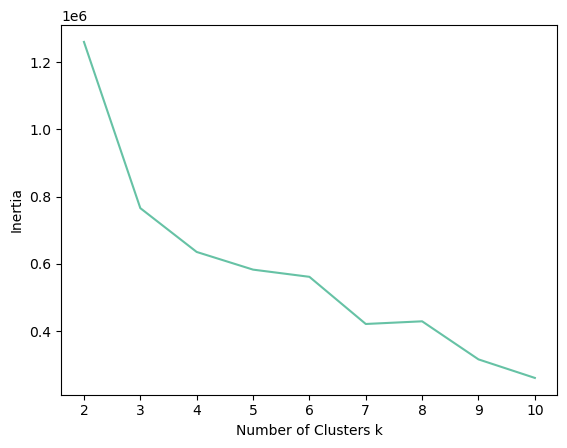

In [110]:
# Visualizing optimal k using elbow method
sns.lineplot(x=range(2, 11), y=inertia, markers=True)
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia')
plt.show()

In [111]:
inertia

[1260068.96333118,
 765940.4456436348,
 635654.9437160544,
 583121.3291060345,
 561712.1080171188,
 421519.3423566051,
 429459.2884191482,
 316254.88999113627,
 261148.80419958965]

From the elbow plot above the optimal number of clusters is clearly 4 since that is where the 'elbow' of the plot is located.

In [141]:
X = bin_df[['Recency', 'Frequency_log', 'Monetary_log']]
# Perform clustering using k=3
best_model = KMeans(n_clusters=3, init='k-means++', n_init='auto')
# Add cluster column to RFM score df
bin_df['Cluster'] = best_model.fit_predict(X)
bin_df

,Recency,Monetary_log,Frequency_log,Cluster
CustomerID,,,,
C1010011,1.0,4.0,1.0,1
C1010012,4.0,3.0,0.0,0
C1010014,4.0,3.0,1.0,0
C1010018,2.0,1.0,0.0,0
C1010024,3.0,4.0,0.0,2
...,...,...,...,...
C9099836,4.0,3.0,0.0,0
C9099877,2.0,2.0,0.0,1
C9099919,3.0,2.0,0.0,0


In [142]:
bin_df['Cluster'].value_counts()

Cluster
0    439883
1    333781
2    102144
Name: count, dtype: int64

In [143]:
# Calculating mean RFM scores for each cluster
cluster_RFM = bin_df.groupby('Cluster').agg({'Recency':'mean', 'Frequency_log':'mean', 'Monetary_log': 'mean'})
cluster_RFM

,Recency,Frequency_log,Monetary_log
Cluster,,,
0,3.450909,0.060880,2.144586
1,1.871518,0.364790,2.827429
2,3.558701,0.141124,3.995164


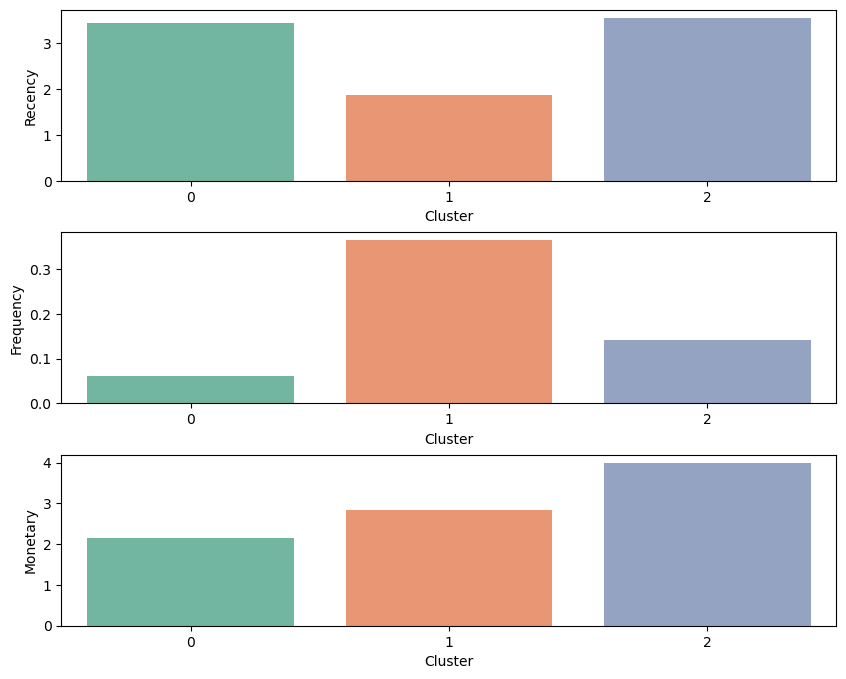

In [144]:
# Plotting the mean RFM scores for each cluster for visualization
plt.figure(figsize=(10, 8))

# Plotting mean Recency
plt.subplot(3, 1, 1)
sns.barplot(data=cluster_RFM, x=cluster_RFM.index, y='Recency')
plt.xlabel('Cluster')
plt.ylabel('Recency')

# Plotting mean frequency
plt.subplot(3, 1, 2)
sns.barplot(data=cluster_RFM, x=cluster_RFM.index, y='Frequency_log')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# Plotting mean monetary
plt.subplot(3, 1, 3)
sns.barplot(data=cluster_RFM, x=cluster_RFM.index, y='Monetary_log')
plt.xlabel('Cluster')
plt.ylabel('Monetary')

plt.subplots_adjust(hspace=0.3)
plt.show()

In [145]:
cluster_RFM.index.value_counts()

Cluster
0    1
1    1
2    1
Name: count, dtype: int64

We can see some trends here in the groups. However the frequency column is not very useful as all clusters have similar mean values. We can try adjusting the bins edges to see if we can achieve better frequency differences between each cluster.

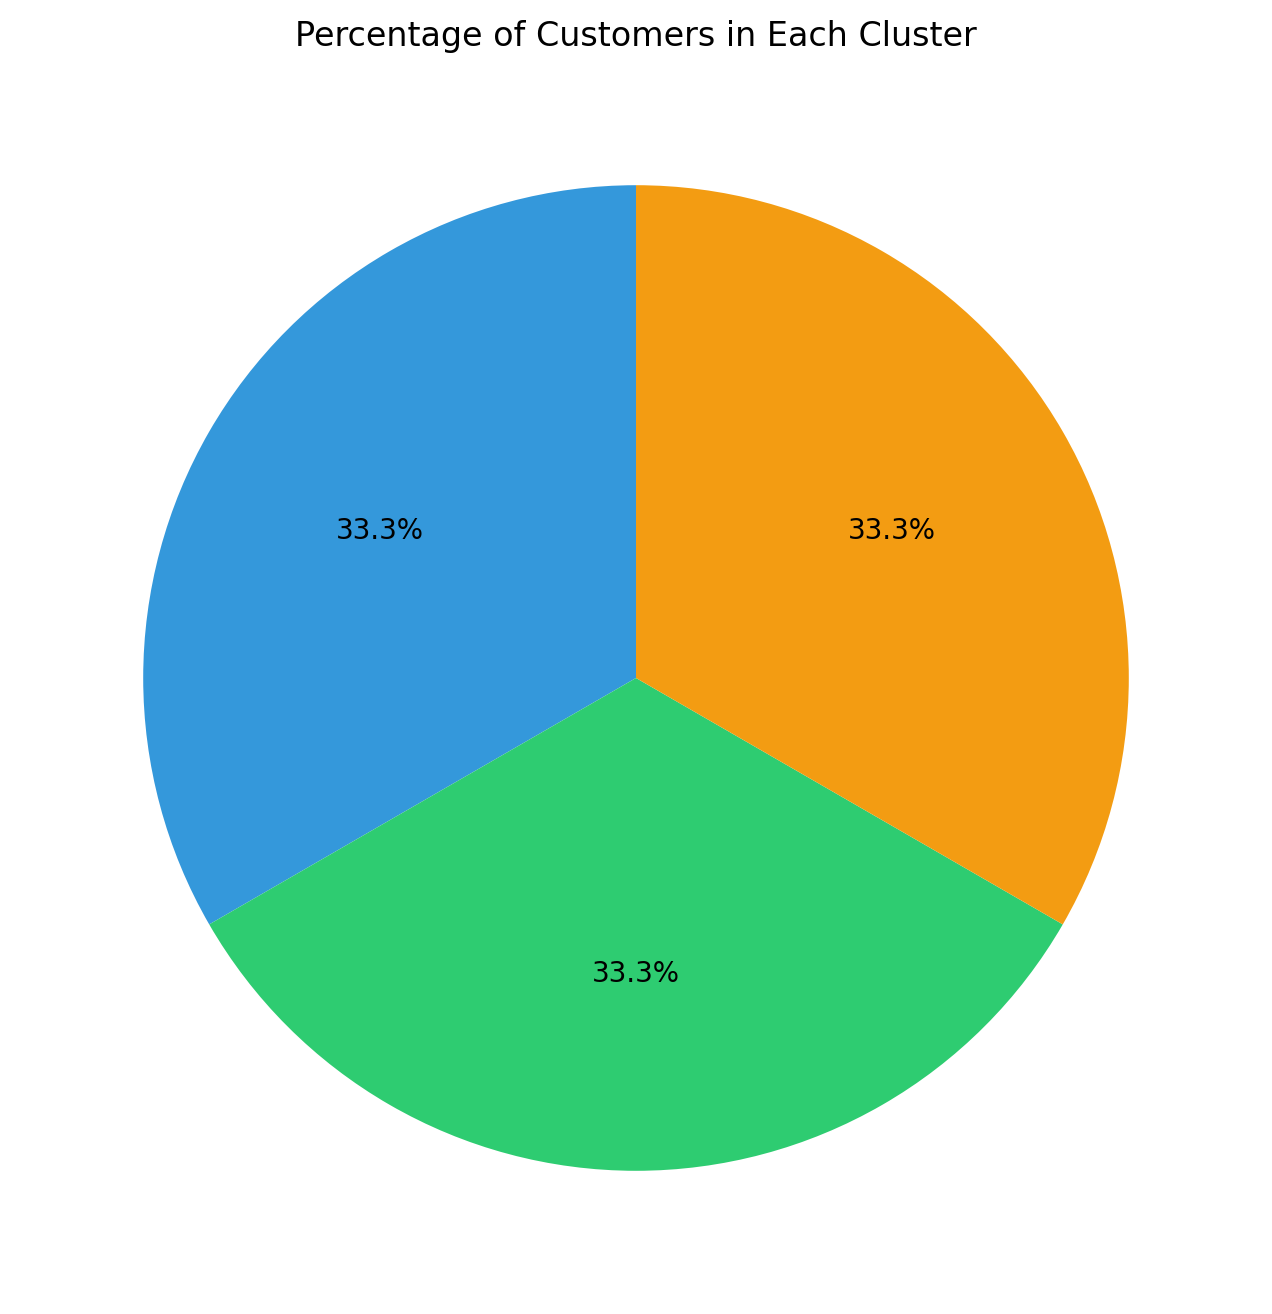

In [146]:
cluster_counts = cluster_RFM.index.value_counts()

colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']
# Calculate the total number of customers
total_customers = cluster_counts.sum()

# Calculate the percentage of customers in each cluster
percentage_customers = (cluster_counts / total_customers) * 100

# labels = ['Champions(Power Shoppers)','Loyal Customers','At-risk Customers','Recent Customers']

# Create a pie chart
plt.figure(figsize=(8, 8),dpi=200)
plt.pie(percentage_customers, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Customers in Each Cluster')
# plt.legend(cluster_summary['Cluster'], title='Cluster', loc='upper left')

plt.show()